# <span style="color:red"> Récupération et affichage des informations demandées, tests, etc  </span>

# <span style="color:red">Étape 1 : Connexion SSH au DSLAM </span>

In [2]:
# Importation des librairies
import paramiko
import numpy as np
import matplotlib.pyplot as plt
import time as t
import re as r
from tabulate import tabulate

ModuleNotFoundError: No module named 'tabulate'

In [91]:
IP = "192.168.0.1"
ssh_port = 22
user = 'admin'
passw = '1234'

################################
# Création de la connexion SSH #
################################
#connexion à un serveur SSH via SSHClient()
#1
ssh_client = paramiko.SSHClient() 
#2
ssh_client.set_missing_host_key_policy(paramiko.AutoAddPolicy())
#3.
ssh_client.connect(hostname = IP, port = ssh_port, username = user, password = passw)
print(f"Connecté en SSH à l'équipement d'IP {IP}")
t.sleep(2)
print("Succès !")




Connecté en SSH à l'équipement d'IP 192.168.0.1
Succès !


#1. Le module paramiko permet de créer un client SSH pour se connecter à un serveur SSH via la classe SSHClient()

#2.
La classe intégrée AutoAddPolicy() ajoutera les clés d'hôtes au fur et à mesure de leurs découvertes, il faut pour cela exécuter la méthode 
set_missing_host_key_policy().

#3.
La connexion est maintenant chiffrée et SSH a maintenant besoin des identifiants d'authentification pour savoir quel utilisateur spécifique souhaite se connecter.<br>
Utiliser la combinaison nom d'utilisateur et mot de passe ce que nous ferons ici avec la méthode connect()

### Canal Shell
On va utiliser le canal shell avec la commande « invoke_shell ». <br><br>
La méthode send permet d’envoyer une commande dans le canal et la méthode recv
de lire le buffer dans lequel est stockée la réponse (8000 correspond au nombre 
maximal d’octets qu’on lit dans le buffer de réception).<br>
<br>Il est évidemment préférable 
d’avoir un temps d’attente sleep(1) pour être sûr que la commande a bien été 
envoyée et la réponse reçue avant de lire le buffer.<br><br>

On utilisera de préférence l’instruction with qui permet de d’ouvrir et fermer automatiquement le canal même en cas d’erreur.

In [2]:
import time as t
import re as r

IP = "192.168.0.1"
ssh_port = 22
user = 'admin'
passw = '1234'
nb_pages = 6

# Création de la connexion SSH
ssh_client = paramiko.SSHClient()
ssh_client.set_missing_host_key_policy(paramiko.AutoAddPolicy())
ssh_client.connect(hostname = IP, port = ssh_port, username = user, password = passw)
print(f"Connecté en SSH à l'équipement d IP {IP} \n") 
# Création du canal est envoi des commandes

with ssh_client.invoke_shell() as channel:
    channel.send('show vdsl-status subcarrier qln 23 2'+'\n')
    t.sleep(1)
    output = ""
    for i in range(nb_pages) : # Boucle pour afficher 6 fois les status vdsl
        try:
            print("Chargement...\n")
            page = channel.recv(60000).decode("utf-8")
            output += page
            t.sleep(1)
            channel.send(' '+'\n')          
        except :
            pass
    print("Succès !")
    print(output)

Connecté en SSH à l'équipement d IP 192.168.0.1 

Chargement...

Chargement...

Chargement...

Chargement...

Chargement...

Chargement...

Succès !
Copyright (c) 1994 - 2014 ZyXEL Communications Corp.
VES1724-56# 7show vdsl-status subcarrier qln 23 2
777777777777777777777777777777777777   
  VDSL status sub-carrier QLN(dBm/Hz):
  port 23 Down Stream, group size: 1
            01     02     03     04      05     06     07     08
  --------------------------------------------------------------
  (001) -150.5 -150.5 -150.5 -150.5  -150.5 -150.5 -150.5 -150.5
  (009) -150.5 -150.5 -150.5 -150.5  -150.5 -150.5 -150.5 -150.5
  (017) -150.5 -150.5 -150.5 -150.5  -150.5 -150.5 -150.5 -150.5
  (025) -150.5 -150.5 -150.5 -150.5  -150.5 -150.5 -150.5 -150.5
  (033) -150.5 -123.0 -123.5 -123.0  -123.0 -123.0 -122.0 -122.5
  (041) -122.5 -123.0 -122.0 -122.0  -121.5 -122.0 -121.5 -121.5
  (049) -121.0 -121.5 -121.0 -121.5  -121.0 -120.5 -121.5 -121.0
  (057) -1

# <span style="color:red">Étape 2 : Parsing des données</span>

### Partie théorique avec Regex et boucle

In [3]:
parse = r.findall(r'[\w,.,-]+', output)  #on parse nos données par mots, en comptant les "virgules" des nombres.#
#print(parse) #affichage#

a = len(parse) #récuperation du nombre d'objet dans parse
Tab1 = [] #création d'un tableau 
for i in range(a): # parcourt la totalité de parse 
    if parse[i] == "001" : #recherche de l'élément  001
        i += 1
        for j in range(8): # récupération des 8 éléments suivants :
            Tab1.append(parse[i+j]) #i+j = part de notre élément 001 et récupère nos éléments 
print(Tab1) #affiche notre tableau

['-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5']


In [4]:
def récup_ligne(num) :
    a = len(parse)
    Tableau = []
    for i in range(a):
        if parse[i] == num :
            i += 1
            for j in range(8):
                uwu.append(parse[i+j])
    print(Tableau)


In [5]:
Parse1 = []
compt = 0
for i in range(len(parse)):
    if parse[i] == "-------------------------------------------------------":
        compt = i+1
for n in range (compt,len(parse)-12):
    Parse1.append(parse[n])
print(Parse1)

['Copyright', 'c', '1994', '-', '2014', 'ZyXEL', 'Communications', 'Corp.', 'VES1724-56', '7show', 'vdsl-status', 'subcarrier', 'qln', '23', '2', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', 'VDSL', 'status', 'sub-carrier', 'QLN', 'dBm', 'Hz', 'port', '23', 'Down', 'Stream,', 'group', 'size', '1', '01', '02', '03', '04', '05', '06', '07', '08', '--------------------------------------------------------------', '001', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '009', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '017', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '025', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '033', '-150.5', '-123.0', '-123.5', '-123.0', '-123.0', '-123.0', '-122.0', '-122.5', '041', '-122.5', 

In [6]:
Parsef = []
for i in range (len(Parse1)):
    if i%9 != 0 :
        Parsef.append(Parse1[i])
print(Parsef)

['c', '1994', '-', '2014', 'ZyXEL', 'Communications', 'Corp.', 'VES1724-56', 'vdsl-status', 'subcarrier', 'qln', '23', '2', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', 'VDSL', 'status', 'sub-carrier', 'dBm', 'Hz', 'port', '23', 'Down', 'Stream,', 'group', 'size', '01', '02', '03', '04', '05', '06', '07', '08', '001', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '009', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '017', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '025', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '033', '-150.5', '-123.0', '-123.5', '-123.0', '-123.0', '-123.0', '-122.0', '041', '-122.5', '-123.0', '-122.0', '-122.0', '-121.5', '-122.0', '-121.5', '049', '-121.0', '-121.5', '-121.0', '-121.5', '-121.0', '-120.5', '-121.5', '057', '-121.0', '-121.0', '-120.

### Partie qu'en REGEX

[- +] | Correspondon à un seul caractère présent dans la liste (-, espace et +) <br>
[- +]\d\d | Correspondon à un seul caractère présent dans la liste (-, espace et +) avec deux valeurs digitales minimum.<br>
[- +]\d\d+ | Va permettre d'ajouter autant de valeurs qu'il y a après les deux digits.<br>
[- +]\d\d+. | Correspond à n'importe quel caractère.<br>
[- +]\d\d+.[.] | Permet de parser le point apres les nombres.<br>
[- +]\d\d+.[.]\d | Et ensuite y ajouter le chiffre final après le point.<br>


### Pour n'importe quel paramètre de la sous-porteuse au-dessus sauf bitAlloc :

In [7]:
Parse_r = r.findall(r'[- +]\d\d+.[.]\d', output) 
print(Parse_r)

['-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-150.5', '-123.0', '-123.5', '-123.0', '-123.0', '-123.0', '-122.0', '-122.5', '-122.5', '-123.0', '-122.0', '-122.0', '-121.5', '-122.0', '-121.5', '-121.5', '-121.0', '-121.5', '-121.0', '-121.5', '-121.0', '-120.5', '-121.5', '-121.0', '-121.0', '-121.0', '-120.5', '-121.0', '-120.5', '-121.0', '-120.5', '-120.5', '-121.0', '-121.0', '-121.0', '-121.5', '-121.5', '-121.5', '-121.5', '-121.0', '-121.5', '-121.5', '-122.0', '-121.5', '-122.0', '-121.5', '-122.0', '-121.5', '-122.0', '-122.0', '-122.0', '-122.0', '-122.0', '-122.0', '-121.0', '-121.5', '-121.5', '-121.5', '-122.0', '-122.0', '-121.5', '-122.0', '-122.5', '-122.0', '-122.5', '-122.0', '-123.0', '-122.5',

### Pour bitAlloc :

In [8]:
import time as t
import re as r

IP = "192.168.0.1"
ssh_port = 22
user = 'admin'
passw = '1234'
nb_pages = 6

# Création de la connexion SSH
ssh_client = paramiko.SSHClient()
ssh_client.set_missing_host_key_policy(paramiko.AutoAddPolicy())
ssh_client.connect(hostname = IP, port = ssh_port, username = user, password = passw)
print(f"Connecté en SSH à l'équipement d IP {IP} \n") 
# Création du canal est envoi des commandes

with ssh_client.invoke_shell() as channel:
    channel.send('show vdsl-status subcarrier bitAlloc 23 1'+'\n')
    t.sleep(1)
    output = ""
    for i in range(nb_pages) : # Boucle pour afficher 6 fois les status vdsl
        try:
            print("Chargement...\n")
            page = channel.recv(60000).decode("utf-8")
            output += page
            t.sleep(1)
            channel.send(' '+'\n')          
        except :
            pass
    print("Succès !")
    print(output)

Connecté en SSH à l'équipement d IP 192.168.0.1 

Chargement...

Chargement...

Chargement...

Chargement...

Chargement...

Chargement...

Succès !
Copyright (c) 1994 - 2014 ZyXEL Communications Corp.
VES1724-56# 7show vdsl-status subcarrier bitAlloc 23 1
77777777777777777777777777777777777777777   
  VDSL status sub-carrier BitAlloc(bits):
  port 23 Up Stream, BpscReqCount=123
            01    02    03    04     05    06    07    08
  -------------------------------------------------------
  (0001)     0     0     0     0      0     0     0     7
  (0009)     9    10    11    13     13    13    14    14
  (0017)    14    14    15    15     15    15    15    15
  (0025)    15    15    15    15     14    13    12    10
  (0033)     0     0     0     0      0     0     0     0
  (0041)     0     0     0     0      0     0     0     0
  (0049)     0     0     0     0      0     0     0     0
  (0057)     0     0     0     0      0     0     0   

#### Création du tableau de parsing

In [9]:
a= r.search("(0001)",output) # On cherche (0001)

b= output[a.start()-1:] #Permet de créer un String qui commence à la valeur de a - 1

c= r.search("VES1724-56#",b) # On cherche VES1724-56#

d = b[0:c.start()] # Permet de récupérer le début du string de b et de s'arrêter au début de c (qui est la fin de nos valeurs)

d

'(0001)     0     0     0     0      0     0     0     7\r\n  (0009)     9    10    11    13     13    13    14    14\r\n  (0017)    14    14    15    15     15    15    15    15\r\n  (0025)    15    15    15    15     14    13    12    10\r\n  (0033)     0     0     0     0      0     0     0     0\r\n  (0041)     0     0     0     0      0     0     0     0\r\n  (0049)     0     0     0     0      0     0     0     0\r\n  (0057)     0     0     0     0      0     0     0     0\r\n  (0065)     0     0     0     0      0     0     0     0\r\n  (0073)     0     0     0     0      0     0     0     0\r\n  (0081)     0     0     0     0      0     0     0     0\r\n  (0089)     0     0     0     0      0     0     0     0\r\n  (0097)     0     0     0     0      0     0     0     0\r\n  (0105)     0     0     0     0      0     0     0     0\r\n  (0113)     0     0     0     0      0     0     0     0\r\n  (0121)     0     0     0     0      0     0     0     0\r\n\r\n  (0129)     0     0 

#### Parsing

In [10]:
Parse_bit = r.findall(r'\d | \d*\d',d) # \d correspond à n'importe quel chiffre entre 0-9, | c'est ou, \d*\d correspond à n'importe
#2 chiffres entre 0-9 ou * permet d'inclure autant de fois que possible ce qu'il y'a avant le 2eme digit
print('Nombre de chiffres total : ',len(Parse_bit), '\n')
print('Nombre de sous porteuse : ',len(Parse_bit)/8, '\n')
print(Parse_bit)

Nombre de chiffres total :  4096 

Nombre de sous porteuse :  512.0 

[' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 7', ' 9', ' 10', ' 11', ' 13', ' 13', ' 13', ' 14', ' 14', ' 14', ' 14', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 14', ' 13', ' 12', ' 10', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', 

# <span style="color:red">Étape 3 : Affichage des courbes</span>

# <span style="color:red">Pour QLN : </span>

## Downstream

In [11]:
import time as t
import re as r

IP = "192.168.0.1"
ssh_port = 22
user = 'admin'
passw = '1234'
nb_pages = 6

# Création de la connexion SSH
ssh_client = paramiko.SSHClient()
ssh_client.set_missing_host_key_policy(paramiko.AutoAddPolicy())
ssh_client.connect(hostname = IP, port = ssh_port, username = user, password = passw)
print(f"Connecté en SSH à l'équipement d IP {IP} \n") 
# Création du canal est envoi des commandes

with ssh_client.invoke_shell() as channel:
    channel.send('show vdsl-status subcarrier qln 23 2'+'\n')
    t.sleep(1)
    output1 = ""
    for i in range(nb_pages) : # Boucle pour afficher 6 fois les status vdsl
        try:
            print("Chargement...\n")
            page1 = channel.recv(60000).decode("utf-8")
            output1 += page1
            t.sleep(1)
            channel.send(' '+'\n')          
        except :
            pass
    print("Succès !")
    print(output1)

Connecté en SSH à l'équipement d IP 192.168.0.1 

Chargement...

Chargement...

Chargement...

Chargement...

Chargement...

Chargement...

Succès !
Copyright (c) 1994 - 2014 ZyXEL Communications Corp.
VES1724-56# 7show vdsl-status subcarrier qln 23 2
777777777777777777777777777777777777   
  VDSL status sub-carrier QLN(dBm/Hz):
  port 23 Down Stream, group size: 1
            01     02     03     04      05     06     07     08
  --------------------------------------------------------------
  (001) -150.5 -150.5 -150.5 -150.5  -150.5 -150.5 -150.5 -150.5
  (009) -150.5 -150.5 -150.5 -150.5  -150.5 -150.5 -150.5 -150.5
  (017) -150.5 -150.5 -150.5 -150.5  -150.5 -150.5 -150.5 -150.5
  (025) -150.5 -150.5 -150.5 -150.5  -150.5 -150.5 -150.5 -150.5
  (033) -150.5 -123.0 -123.5 -123.0  -123.0 -123.0 -122.0 -122.5
  (041) -122.5 -123.0 -122.0 -122.0  -121.5 -122.0 -121.5 -121.5
  (049) -121.0 -121.5 -121.0 -121.5  -121.0 -120.5 -121.5 -121.0
  (057) -1

## Upstream

In [12]:
import time as t
import re as r

IP = "192.168.0.1"
ssh_port = 22
user = 'admin'
passw = '1234'
nb_pages = 6

# Création de la connexion SSH
ssh_client = paramiko.SSHClient()
ssh_client.set_missing_host_key_policy(paramiko.AutoAddPolicy())
ssh_client.connect(hostname = IP, port = ssh_port, username = user, password = passw)
print(f"Connecté en SSH à l'équipement d IP {IP} \n") 
# Création du canal est envoi des commandes

with ssh_client.invoke_shell() as channel:
    channel.send('show vdsl-status subcarrier qln 23 1'+'\n')
    t.sleep(1)
    output2 = ""
    for i in range(nb_pages) : # Boucle pour afficher 6 fois les status vdsl
        try:
            print("Chargement...\n")
            page2 = channel.recv(60000).decode("utf-8")
            output2 += page2
            t.sleep(1)
            channel.send(' '+'\n')          
        except :
            pass
    print("Succès !")
    #print(output2)
    channel.close()

Connecté en SSH à l'équipement d IP 192.168.0.1 

Chargement...

Chargement...

Chargement...

Chargement...

Chargement...

Chargement...

Succès !


In [6]:
qln_down      = open("qln_down.txt")
qln_up        = open("qln_up.txt")
qln_down_read     = qln_down.read()
qln_up_read      = qln_up.read()

In [7]:
QLN = qln_up_read + qln_down_read
Stream_QLN = r.findall(r'[- +]\d*.[.]\d', QLN)

## Affichage de la courbe pour qln :

Text(0, 0.5, 'Puissance en dBm')

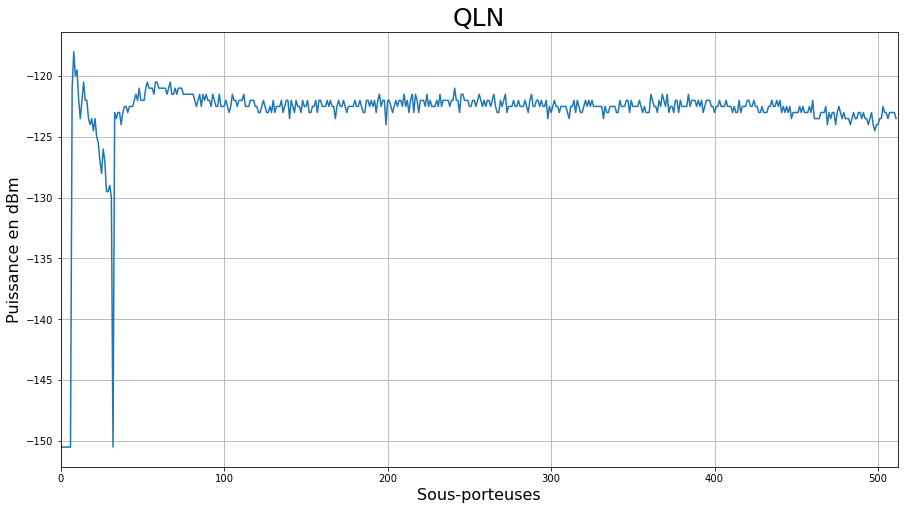

In [8]:
lstAQLN = Stream_QLN[0:32] # Canal de 0 à 32 sens montant
lstDQLN = Stream_QLN[32+512:512+512] # Canal de 32 à 512 sens descendant
lstCQLN = lstAQLN + lstDQLN

lstQLN = [float(i) for i in lstCQLN]

fig,ax = plt.subplots(figsize = (15,8))
ax.plot(lstQLN)
ax.grid()
ax.set_title('QLN', fontsize = 25)
ax.set_xlim(0,512)

plt.xlabel("Sous-porteuses", size = 16)
plt.ylabel("Puissance en dBm", size = 16)

# <span style="color:red">Pour SNR : </span>

## Upstream :

In [15]:
import time as t
import re as r

IP = "192.168.0.1"
ssh_port = 22
user = 'admin'
passw = '1234'
nb_pages = 6

# Création de la connexion SSH
ssh_client = paramiko.SSHClient()
ssh_client.set_missing_host_key_policy(paramiko.AutoAddPolicy())
ssh_client.connect(hostname = IP, port = ssh_port, username = user, password = passw)
print(f"Connecté en SSH à l'équipement d IP {IP} \n") 
# Création du canal est envoi des commandes

with ssh_client.invoke_shell() as channel:
    channel.send('show vdsl-status subcarrier snr 23 1'+'\n')
    t.sleep(1)
    output_SNR_u = ""
    for i in range(nb_pages) : # Boucle pour afficher 6 fois les status vdsl
        try:
            print("Chargement...\n")
            page2 = channel.recv(60000).decode("utf-8")
            output_SNR_u += page2
            t.sleep(1)
            channel.send(' '+'\n')          
        except :
            pass
    print("Succès !")
    #print(output_SNR_u)

Connecté en SSH à l'équipement d IP 192.168.0.1 

Chargement...

Chargement...

Chargement...

Chargement...

Chargement...

Chargement...

Succès !


## Downstream :

In [16]:
# Création de la connexion SSH
ssh_client = paramiko.SSHClient()
ssh_client.set_missing_host_key_policy(paramiko.AutoAddPolicy())
ssh_client.connect(hostname = IP, port = ssh_port, username = user, password = passw)
print(f"Connecté en SSH à l'équipement d IP {IP} \n") 
# Création du canal est envoi des commandes

with ssh_client.invoke_shell() as channel:
    channel.send('show vdsl-status subcarrier snr 23 2'+'\n')
    t.sleep(1)
    output_SNR_d = ""
    for i in range(nb_pages) : # Boucle pour afficher 6 fois les status vdsl
        try:
            print("Chargement...\n")
            page2 = channel.recv(60000).decode("utf-8")
            output_SNR_d += page2
            t.sleep(1)
            channel.send(' '+'\n')          
        except :
            pass
    print("Succès !")
    #print(output_SNR_d)

Connecté en SSH à l'équipement d IP 192.168.0.1 

Chargement...

Chargement...

Chargement...

Chargement...

Chargement...

Chargement...

Succès !


In [1]:
snr_down      = open("snr_down.txt")
snr_up        = open("snr_up.txt")

snr_down_read = snr_down.read()
snr_up_read = snr_up.read()

In [3]:
SNR = snr_up_read + snr_down_read 
Stream_SNR = r.findall(r'[- +]\d*.[.]\d', SNR)

## Affichage de la courbe

Text(0, 0.5, 'Puissance en dBm')

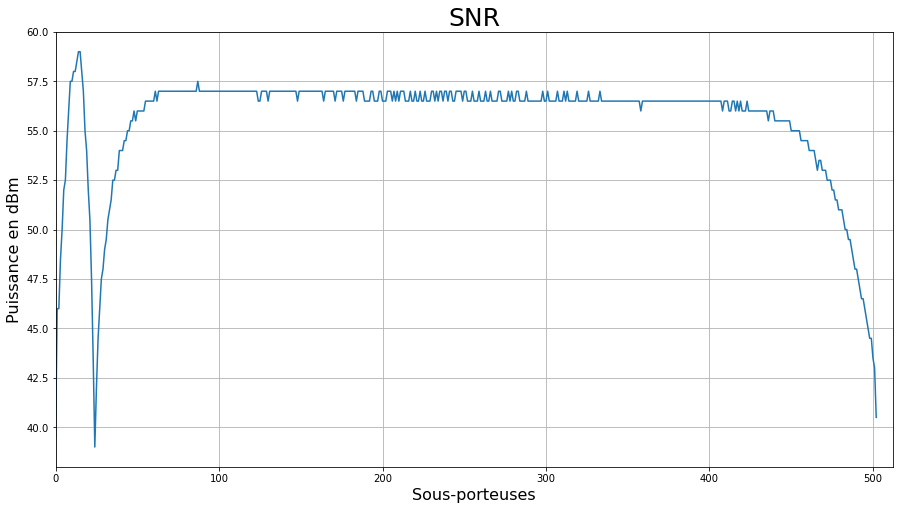

In [4]:
lstASNR = Stream_SNR[8:32] # Canal de 0 à 32 sens montant
lstDSNR = Stream_SNR[33+512:512+512] # Canal de 32 à 512 sens descendant
lstCSNR = lstASNR + lstDSNR

lstSNR = [float(i) for i in lstCSNR]

fig,ax = plt.subplots(figsize = (15,8))
ax.plot(lstSNR)
ax.grid()
ax.set_title('SNR', fontsize = 25)
ax.set_xlim(0,512)

plt.xlabel("Sous-porteuses", size = 16)
plt.ylabel("Puissance en dBm", size = 16)

# <span style="color:red">Pour HLOG : </span>

## Upstream

In [20]:
# Création de la connexion SSH
ssh_client = paramiko.SSHClient()
ssh_client.set_missing_host_key_policy(paramiko.AutoAddPolicy())
ssh_client.connect(hostname = IP, port = ssh_port, username = user, password = passw)
print(f"Connecté en SSH à l'équipement d IP {IP} \n") 
# Création du canal est envoi des commandes

with ssh_client.invoke_shell() as channel:
    channel.send('show vdsl-status subcarrier hlog 23 1'+'\n')
    t.sleep(1)
    outputHM = ""
    for i in range(nb_pages) : # Boucle pour afficher 6 fois les status vdsl
        try:
            print("Chargement...\n")
            page = channel.recv(60000).decode("utf-8")
            outputHM += page
            t.sleep(1)
            channel.send(' '+'\n')
            channel.close()
        except :
            pass
    print("Succès !")
    #print(outputHM)

Connecté en SSH à l'équipement d IP 192.168.0.1 

Chargement...

Chargement...

Chargement...

Chargement...

Chargement...

Chargement...

Succès !


## Downstream

In [21]:
# Création de la connexion SSH
ssh_client = paramiko.SSHClient()
ssh_client.set_missing_host_key_policy(paramiko.AutoAddPolicy())
ssh_client.connect(hostname = IP, port = ssh_port, username = user, password = passw)
print(f"Connecté en SSH à l'équipement d IP {IP} \n") 
# Création du canal est envoi des commandes

with ssh_client.invoke_shell() as channel:
    channel.send('show vdsl-status subcarrier hlog 23 2'+'\n')
    t.sleep(1)
    outputHD = ""
    for i in range(nb_pages) : # Boucle pour afficher 6 fois les status vdsl
        try:
            print("Chargement...\n")
            page = channel.recv(60000).decode("utf-8")
            outputHD += page
            t.sleep(1)
            channel.send(' '+'\n')
            channel.close()
        except :
            pass
    print("Succès !")
    #print(outputHD)

Connecté en SSH à l'équipement d IP 192.168.0.1 

Chargement...

Chargement...

Chargement...

Chargement...

Chargement...

Chargement...

Succès !


In [13]:
hlog_down     = open("hlog_down.txt")
hlog_up       = open("hlog_up.txt")
hlog_down     = hlog_down.read()
hlog_up       = hlog_up.read()

In [14]:
# Création de mes fonctions upstream et downstream
Upstream_hlog = r.findall(r'[- +]\d*.[.]\d', hlog_up) 
Downstream_hlog = r.findall(r'[- +]\d*.[.]\d', hlog_down) 


## Affichage de la courbe

Text(0, 0.5, 'Puissance en dB')

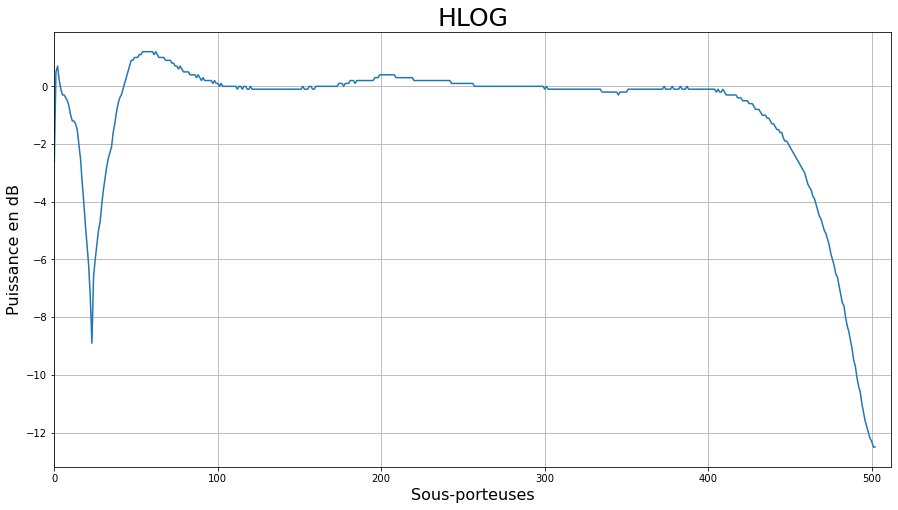

In [26]:
lstAHLOG = Upstream_hlog[8:32] # Canal de 0 à 32 sens montant
lstDHLOG = Downstream_hlog[33:512] # Canal de 32 à 512 sens descendant
lstcmb = lstAHLOG + lstDHLOG

lsthlog = [float(i) for i in lstcmb]

fig,ax = plt.subplots(figsize = (15,8))
ax.plot(lsthlog)
ax.grid()
ax.set_title('HLOG', fontsize = 25)
ax.set_xlim(0,512)

plt.xlabel("Sous-porteuses", size = 16)
plt.ylabel("Puissance en dB", size = 16)

# <span style="color:red">Pour BITALLOC : </span>

## Upstream

In [24]:
# Création de la connexion SSH
ssh_client = paramiko.SSHClient()
ssh_client.set_missing_host_key_policy(paramiko.AutoAddPolicy())
ssh_client.connect(hostname = IP, port = ssh_port, username = user, password = passw)
print(f"Connecté en SSH à l'équipement d IP {IP} \n") 
# Création du canal est envoi des commandes

with ssh_client.invoke_shell() as channel:
    channel.send('show vdsl-status subcarrier bitAlloc 23 2'+'\n')
    t.sleep(1)
    outputBM = ""
    for i in range(nb_pages) : # Boucle pour afficher 6 fois les status vdsl
        try:
            print("Chargement...\n")
            page = channel.recv(60000).decode("utf-8")
            outputBM += page
            t.sleep(1)
            channel.send(' '+'\n')
            channel.close()
        except :
            pass
    print("Succès !")
    #print(outputBM)

Connecté en SSH à l'équipement d IP 192.168.0.1 

Chargement...

Chargement...

Chargement...

Chargement...

Chargement...

Chargement...

Succès !


## Downstream

In [25]:
import time as t
import re as r

IP = "192.168.0.1"
ssh_port = 22
user = 'admin'
passw = '1234'
nb_pages = 6

# Création de la connexion SSH
ssh_client = paramiko.SSHClient()
ssh_client.set_missing_host_key_policy(paramiko.AutoAddPolicy())
ssh_client.connect(hostname = IP, port = ssh_port, username = user, password = passw)
print(f"Connecté en SSH à l'équipement d IP {IP} \n") 
# Création du canal est envoi des commandes

with ssh_client.invoke_shell() as channel:
    channel.send('show vdsl-status subcarrier bitAlloc 23 2'+'\n')
    t.sleep(1)
    outputBD = ""
    for i in range(nb_pages) : # Boucle pour afficher 6 fois les status vdsl
        try:
            print("Chargement...\n")
            page = channel.recv(60000).decode("utf-8")
            outputBD += page
            t.sleep(1)
            channel.send(' '+'\n')
        except :
            pass
    print("Succès !")
    print(outputBD)

Connecté en SSH à l'équipement d IP 192.168.0.1 

Chargement...

Chargement...

Chargement...

Chargement...

Chargement...

Chargement...

Succès !
Copyright (c) 1994 - 2014 ZyXEL Communications Corp.
VES1724-56# 7show vdsl-status subcarrier bitAlloc 23 2
77777777777777777777777777777777777777777   
  VDSL status sub-carrier BitAlloc(bits):
  port 23 Down Stream, BpscReqCount=125
            01    02    03    04     05    06    07    08
  -------------------------------------------------------
  (0001)     0     0     0     0      0     0     0     0
  (0009)     0     0     0     0      0     0     0     0
  (0017)     0     0     0     0      0     0     0     0
  (0025)     0     0     0     0      0     0     0     0
  (0033)     0    11    12    12     12    13    13    13
  (0041)    13    14    14    14     14    14    15    15
  (0049)    15    15    15    15     15    15    15    15
  (0057)    15    15    15    15     15    15    15 

In [16]:
##Reprises de nos captures
bitAlloc_down = open("bitAlloc_down.txt")
bitAlloc_up   = open("bitAlloc_up.txt")

In [17]:
bitAlloc_read_down = bitAlloc_down.read()
bitAlloc_read_up   = bitAlloc_up.read()

In [18]:
ABM= r.search("(0001)",bitAlloc_read_up) # On cherche (0001)

BBM= bitAlloc_read_up[ABM.start()-1:] #Permet de créer un String qui commence à la valeur de a - 1

CBM= r.search("VES1724-56#",BBM) # On cherche VES1724-56#

DBM = BBM[0:CBM.start()] # Permet de récupérer le début du string de b et de s'arrêter au début de c (qui est la fin de nos valeurs)

print(DBM)

(0001)     0     0     0     0      0     0     0     7

  (0009)     9    11    11    12     13    14    14    14

  (0017)    15    15    15    15     15    15    15    15

  (0025)    15    15    14    14     14    13    11    10

  (0033)     0     0     0     0      0     0     0     0

  (0041)     0     0     0     0      0     0     0     0

  (0049)     0     0     0     0      0     0     0     0

  (0057)     0     0     0     0      0     0     0     0

  (0065)     0     0     0     0      0     0     0     0

  (0073)     0     0     0     0      0     0     0     0

  (0081)     0     0     0     0      0     0     0     0

  (0089)     0     0     0     0      0     0     0     0

  (0097)     0     0     0     0      0     0     0     0

  (0105)     0     0     0     0      0     0     0     0

  (0113)     0     0     0     0      0     0     0     0

  (0121)     0     0     0     0      0     0     0     0



  (0129)     0     0     0     0      0     0     0     

In [19]:
ABD= r.search("(0001)",bitAlloc_read_down) # On cherche (0001)

BBD= bitAlloc_read_down[ABD.start()-1:] #Permet de créer un String qui commence à la valeur de a - 1

CBD= r.search("VES1724-56#",BBD) # On cherche VES1724-56#

DBD = BBD[0:CBD.start()] # Permet de récupérer le début du string de b et de s'arrêter au début de c (qui est la fin de nos valeurs)

print(DBD)

(0001)     0     0     0     0      0     0     0     0

  (0009)     0     0     0     0      0     0     0     0

  (0017)     0     0     0     0      0     0     0     0

  (0025)     0     0     0     0      0     0     0     0

  (0033)     0    10    11    12     12    13    13    13

  (0041)    14    14    14    14     14    15    15    15

  (0049)    15    15    15    15     15    15    15    15

  (0057)    15    15    15    15     15    15    15    15

  (0065)    15    15    15    15     15    15    15    15

  (0073)    15    15    15    15     15    15    15    15

  (0081)    15    15    15    15     15    15    15    15

  (0089)    15    15    15    15     15    15    15    15

  (0097)    15    15    15    15     15    15    15    15

  (0105)    15    15    15    15     15    15    15    15

  (0113)    15    15    15    15     15    15    15    15

  (0121)    15    15    15    15     15    15    15    15



  (0129)    15    15    15    15     15    15    15    1

In [20]:
outputB = DBM + DBD

# Création de mes fonctions upstream et downstream
StreamB = r.findall(r'\d | \d*\d',outputB)
print(len(StreamB))
print(StreamB)

8192
[' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 7', ' 9', ' 11', ' 11', ' 12', ' 13', ' 14', ' 14', ' 14', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 14', ' 14', ' 14', ' 13', ' 11', ' 10', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0',

In [21]:
outputB = DBM + DBD

# Création de mes fonctions upstream et downstream
StreamB = r.findall(r'\d | \d*\d',outputB)
print(len(StreamB))
print(StreamB)

8192
[' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 7', ' 9', ' 11', ' 11', ' 12', ' 13', ' 14', ' 14', ' 14', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 14', ' 14', ' 14', ' 13', ' 11', ' 10', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0',

## Affichage

Text(0, 0.5, 'bits/symboles')

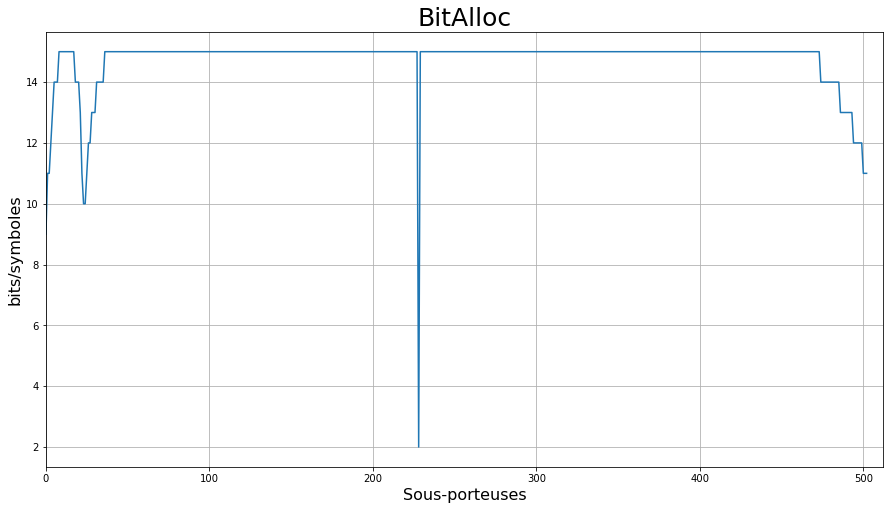

In [27]:
lstAB = StreamB[8:32] # Canal de 0 à 32 sens montant
lstDB = StreamB[4096+33:4096+512] # Canal de 32 à 512 sens descendant
lstCB = lstAB + lstDB

lstB = [float(i) for i in lstCB]

fig,ax = plt.subplots(figsize = (15,8))
ax.plot(lstB)
ax.grid()
ax.set_title('BitAlloc', fontsize = 25)
ax.set_xlim(0,512)

plt.xlabel("Sous-porteuses", size = 16)
plt.ylabel("bits/symboles", size = 16)

# <span style="color:red">Étape 4 : Tableau SNR min, max</span>

In [217]:
classement = []
lstsnrclass = []
lstmini = []
for i in range (0,16) :
    minimum = 12000
    classement = []
    for j in range(len(lstB)):
        if lstB[j] == i :
        
            classement.append(j)
    for k in range (len(classement)):
        
        lstsnrclass.append(lstSNR[classement[k]])
        minimum = min(lstsnrclass)
    
    
    lstmini.append(minimum)


snrmini = []
for x in range (len(lstmini)):
    if lstmini[x] != 12000 :
        snrmini.append(lstmini[x])
    else :
        snrmini.append("null")
print(snrmini)
      


['null', 'null', 56.5, 'null', 'null', 'null', 'null', 'null', 'null', 39.5, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0]


### Tableau SNR minimum

In [218]:
minimum = []
for i in range(16):
    mini = 12000
    for j in range(len(lstSNR)):
        if lstB[j] == i:
            if lstSNR[j] < mini :
                mini = lstSNR[j]
    if mini == 12000 :
        mini = 0
    minimum.append(mini)
print(minimum)

[0, 0, 56.5, 0, 0, 0, 0, 0, 0, 39.5, 39.0, 40.5, 44.5, 46.5, 49.5, 52.5]


### Tableau SNR maximum 

In [219]:
maximum = []
for i in range(16):
    maxi = -1
    for j in range(len(lstSNR)):
        if lstB[j] == i:
            if lstSNR[j] > maxi :
                maxi = lstSNR[j]
    if maxi == -1 :
        maxi = 0
    maximum.append(maxi)
print(maximum)

[0, 0, 56.5, 0, 0, 0, 0, 0, 0, 39.5, 43.5, 47.5, 48.5, 50.5, 55.0, 59.0]


# Tableau SNR moyenne

In [220]:
moyenne = []
for i in range(16):
    somme=[]
    moy = 0
    compteur = 0
    for j in range(len(lstSNR)):
        if lstB[j] == i :
            somme.append(lstSNR[j])
    
    compteur = len(somme)
    if compteur > 0 :
        moy = (sum(somme))/compteur
    moyenne.append(moy)
        
print(moyenne)
            

[0, 0, 56.5, 0, 0, 0, 0, 0, 0, 39.5, 41.25, 44.07142857142857, 45.666666666666664, 48.38461538461539, 51.630434782608695, 56.46420581655481]


# Dictionnaire

In [221]:
my_dict = {"bits":[],"snrmini":[],"snr moy": [],"snr maxi":[],}
for i in range(len(snrmini)):
    my_dict["snrmini"].append(minimum[i])
    my_dict["snr moy"].append(moyenne[i])
    my_dict["snr maxi"].append(maximum[i])
    my_dict["bits"].append(i)
    
# bit, min, moy, max
print(tabulate(my_dict,headers=["bits","SNR mini","SNR moyen", "SNR maxi"]))

  bits    SNR mini    SNR moyen    SNR maxi
------  ----------  -----------  ----------
     0         0         0              0
     1         0         0              0
     2        56.5      56.5           56.5
     3         0         0              0
     4         0         0              0
     5         0         0              0
     6         0         0              0
     7         0         0              0
     8         0         0              0
     9        39.5      39.5           39.5
    10        39        41.25          43.5
    11        40.5      44.0714        47.5
    12        44.5      45.6667        48.5
    13        46.5      48.3846        50.5
    14        49.5      51.6304        55
    15        52.5      56.4642        59


# <span style="color:red">Étape 5 : Partie test réel</span>

# Sur 2 km

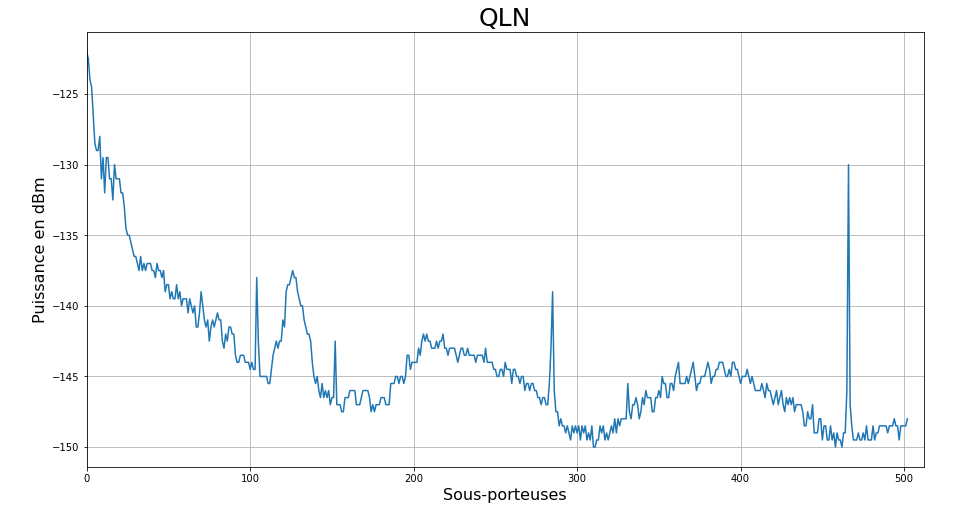

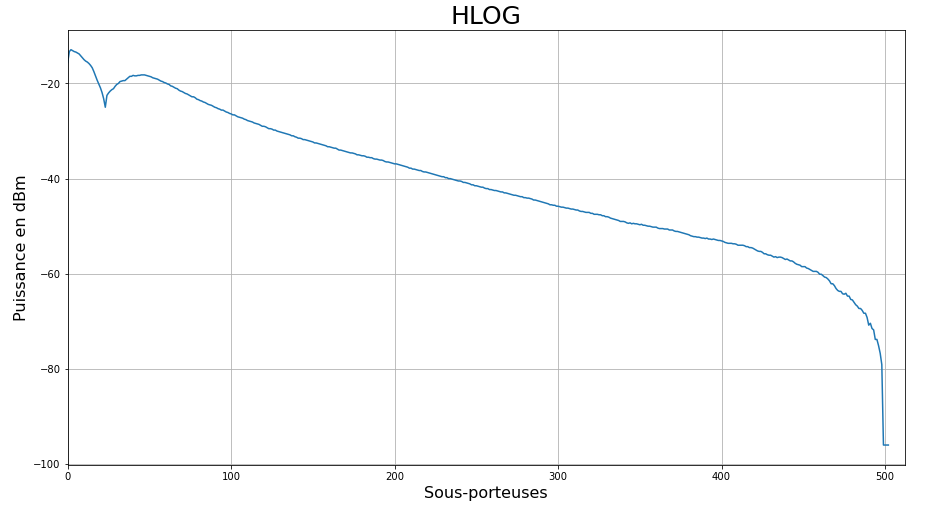

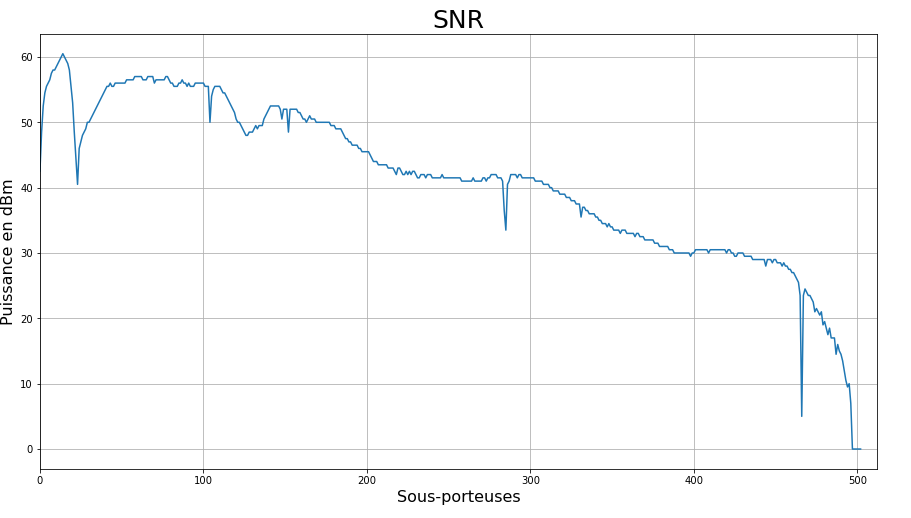

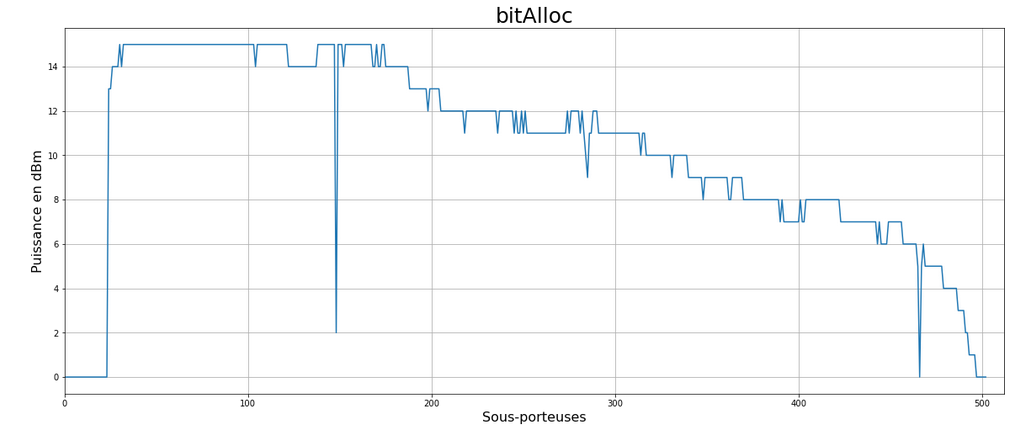

# Sur 3 km

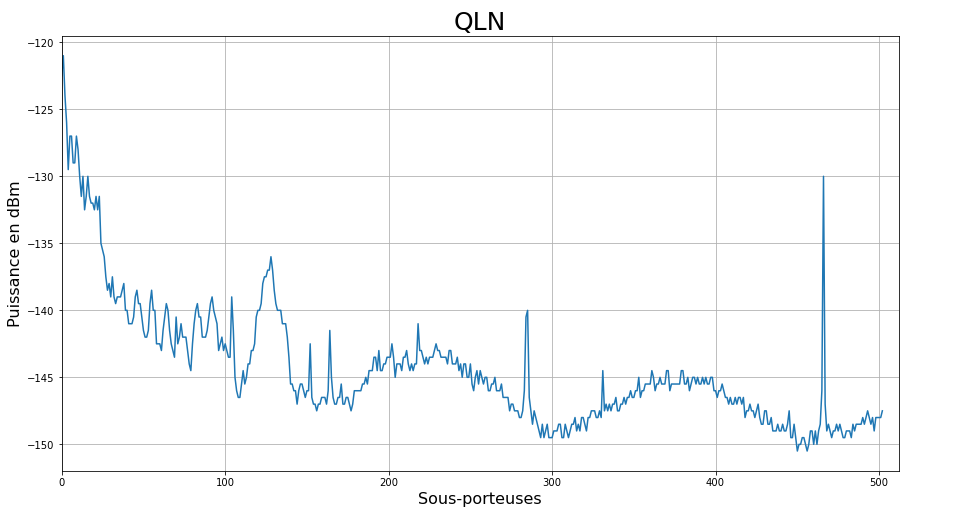

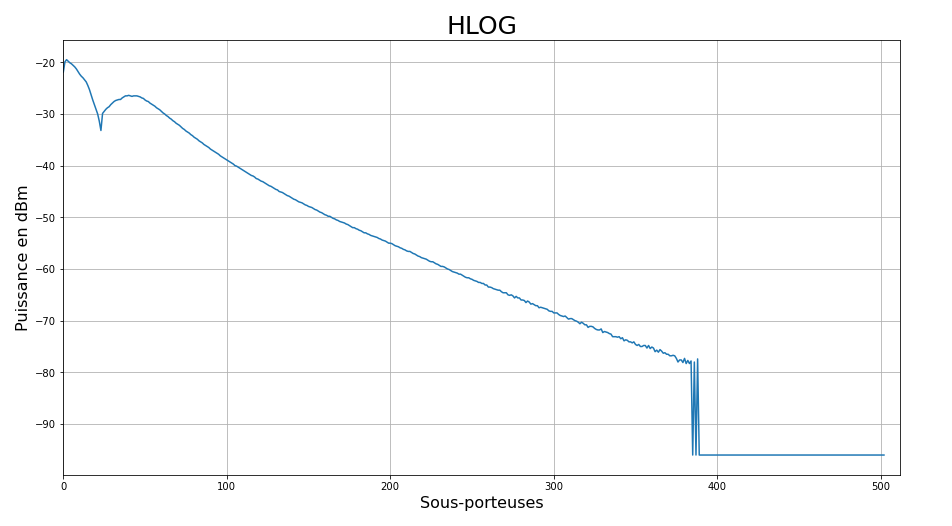

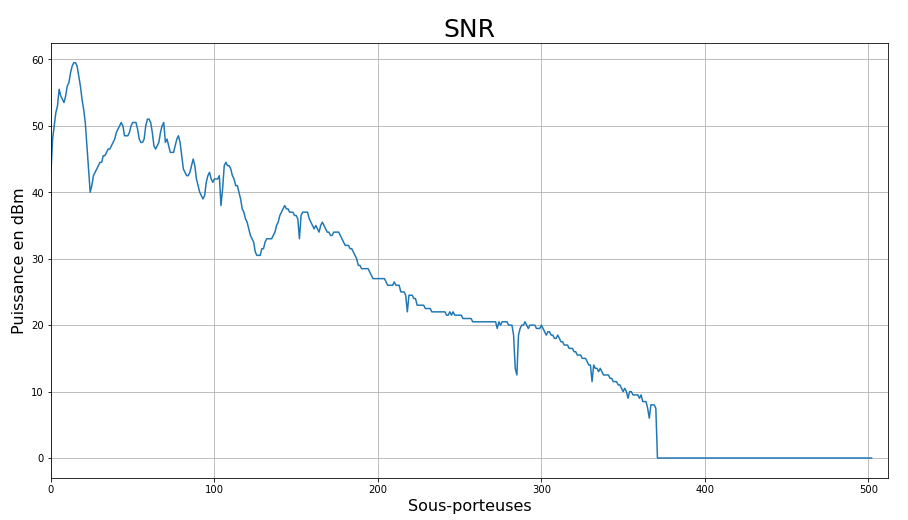

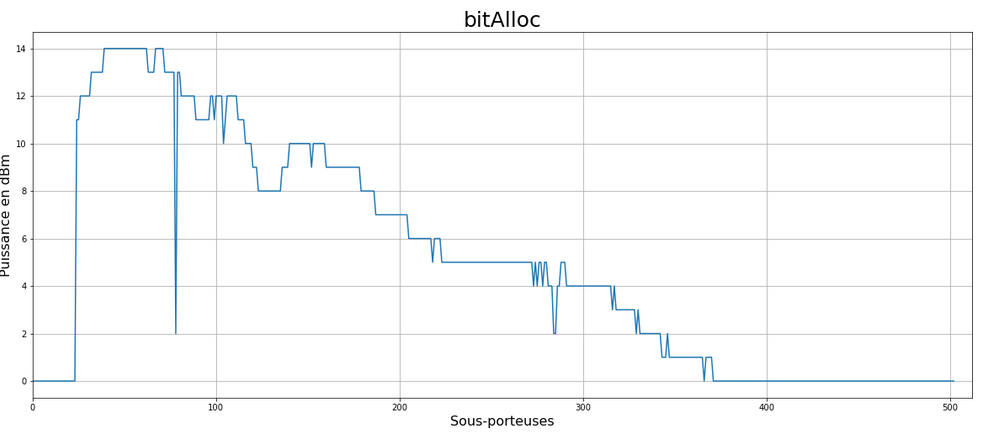

# Graphique 2km Téléphone

# <span style="color:red">Étape 6 : Tableau SNR sur 2km</span>

## SNR 2km

In [184]:
snr_2km_down = open("snr2km_down.txt")
snr_2km_up = open("snr2km_up.txt")

In [185]:
snr_down = snr_2km_down.read()
snr_up = snr_2km_up.read()

### Parsing de SNR

In [188]:
SNR2 = snr_down + snr_up
Stream_SNR2 = r.findall(r'[- +]\d*.[.]\d', SNR)

### Affichage

Text(0, 0.5, 'Puissance en dBm')

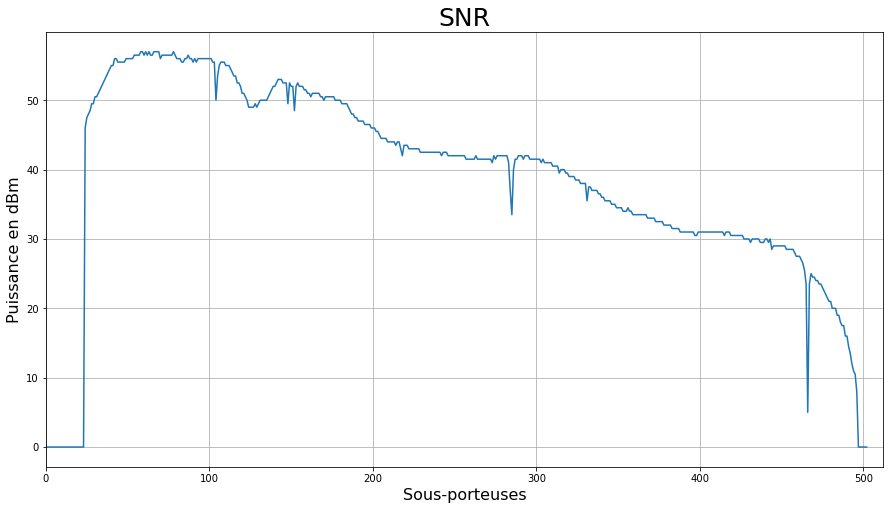

In [191]:
lstASNR = Stream_SNR[8:32] # Canal de 0 à 32 sens montant
lstDSNR = Stream_SNR[33+512:512+512] # Canal de 32 à 512 sens descendant
lstCSNR = lstASNR + lstDSNR

lstSNR2 = [float(i) for i in lstCSNR]

fig,ax = plt.subplots(figsize = (15,8))
ax.plot(lstSNR2)
ax.grid()
ax.set_title('SNR', fontsize = 25)
ax.set_xlim(0,512)

plt.xlabel("Sous-porteuses", size = 16)
plt.ylabel("Puissance en dBm", size = 16)

## bitAlloc 2km

In [201]:
BitAlloc_2km_down = open("BitAlloc2km_down.txt")
BitAlloc_2km_up = open("bobine.txt")

In [202]:
bitAlloc2_down = BitAlloc_2km_down.read()
bitAlloc2_up = BitAlloc_2km_up.read()

In [203]:
ABM= r.search("(0001)",bitAlloc2_up) # On cherche (0001)

BBM= bitAlloc2_up[ABM.start()-1:] #Permet de créer un String qui commence à la valeur de a - 1

CBM= r.search("VES1724-56#",BBM) # On cherche VES1724-56#

DBM = BBM[0:CBM.start()] # Permet de récupérer le début du string de b et de s'arrêter au début de c (qui est la fin de nos valeurs)

print(DBM)

(0001)     0     0     0     0      0     0     0     9

  (0009)    11    12    12    14     14    15    15    15

  (0017)    15    15    15    15     15    15    15    15

  (0025)    15    15    15    15     15    14    12    11

  (0033)     0     0     0     0      0     0     0     0

  (0041)     0     0     0     0      0     0     0     0

  (0049)     0     0     0     0      0     0     0     0

  (0057)     0     0     0     0      0     0     0     0

  (0065)     0     0     0     0      0     0     0     0

  (0073)     0     0     0     0      0     0     0     0

  (0081)     0     0     0     0      0     0     0     0

  (0089)     0     0     0     0      0     0     0     0

  (0097)     0     0     0     0      0     0     0     0

  (0105)     0     0     0     0      0     0     0     0

  (0113)     0     0     0     0      0     0     0     0

  (0121)     0     0     0     0      0     0     0     0



  (0129)     0     0     0     0      0     0     0     

In [204]:
ABD= r.search("(0001)",bitAlloc2_down) # On cherche (0001)

BBD= bitAlloc2_down[ABD.start()-1:] #Permet de créer un String qui commence à la valeur de a - 1

CBD= r.search("VES1724-56#",BBD) # On cherche VES1724-56#

DBD = BBD[0:CBD.start()] # Permet de récupérer le début du string de b et de s'arrêter au début de c (qui est la fin de nos valeurs)

print(DBD)

(0001)     0     0     0     0      0     0     0     0

  (0009)     0     0     0     0      0     0     0     0

  (0017)     0     0     0     0      0     0     0     0

  (0025)     0     0     0     0      0     0     0     0

  (0033)     0    13    13    13     14    14    14    15

  (0041)    15    15    15    15     15    15    15    15

  (0049)    15    15    15    15     15    15    15    15

  (0057)    15    15    15    15     15    15    15    15

  (0065)    15    15    15    15     15    15    15    15

  (0073)    15    15    15    15     15    15    15    15

  (0081)    15    15    15    15     15    15    15    15

  (0089)    15    15    15    15     15    15    15    15

  (0097)    15    15    15    15     15    15    15    15

  (0105)    15    15    15    15     15    15    15    15

  (0113)    15    14    15    15     15    15    15    15

  (0121)    15    15    15    15     15    15    15    15



  (0129)    15    14    14    13     14    14    14    1

In [205]:
outputB = DBM + DBD

# Création de mes fonctions upstream et downstream
StreamB = r.findall(r'\d | \d*\d',outputB)
print(len(StreamB))
print(StreamB)

8192
[' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 9', ' 11', ' 12', ' 12', ' 14', ' 14', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 15', ' 14', ' 12', ' 11', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0'

Text(0, 0.5, 'Puissance en dBm')

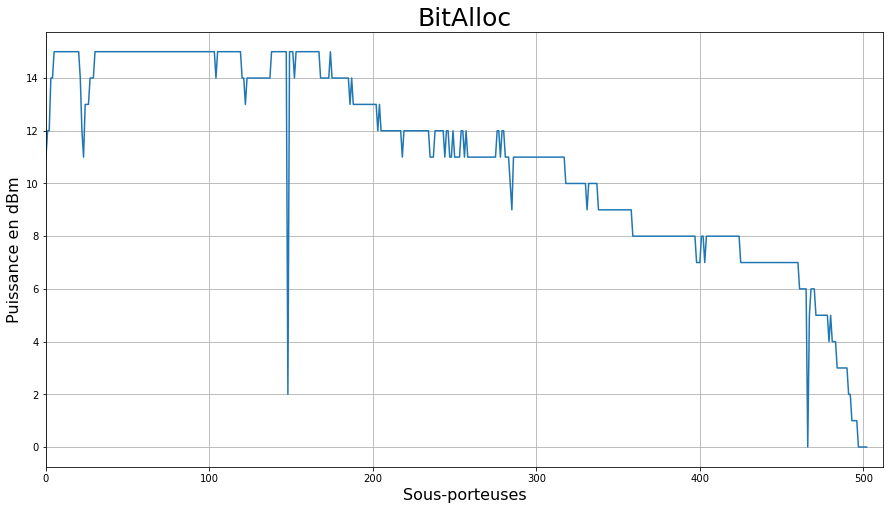

In [208]:
lstAB = StreamB[8:32] # Canal de 0 à 32 sens montant
lstDB = StreamB[4096+33:4096+512] # Canal de 32 à 512 sens descendant
lstCB = lstAB + lstDB

lstB2 = [float(i) for i in lstCB]

fig,ax = plt.subplots(figsize = (15,8))
ax.plot(lstB2)
ax.grid()
ax.set_title('BitAlloc', fontsize = 25)
ax.set_xlim(0,512)

plt.xlabel("Sous-porteuses", size = 16)
plt.ylabel("Puissance en dBm", size = 16)

## Tableau SNR 2km

### Fonction max

In [272]:
maximum2 = []
for i in range(16):
    maxi = -1
    for j in range(len(lstSNR2)):
        if lstB2[j] == i:
            if lstSNR2[j] > maxi :
                maxi = lstSNR2[j]
    if maxi == -1 :
        maxi = 0
    maximum2.append(maxi)
print(maximum2)

[5.0, 12.0, 49.5, 19.0, 21.0, 24.0, 27.5, 31.0, 33.5, 36.5, 39.5, 42.5, 45.5, 50.5, 51.0, 57.0]


### Fonction du minimum

In [273]:
minimum2 = []
for i in range(16):
    mini = 12000
    for j in range(len(lstSNR2)):
        if lstB2[j] == i:
            if lstSNR2[j] < mini :
                mini = lstSNR2[j]
    if mini == 12000 :
        mini = 0
    minimum2.append(mini)
print(minimum2)

[0.0, 8.0, 13.5, 16.0, 20.0, 21.0, 23.5, 27.5, 30.5, 33.5, 37.0, 0.0, 0.0, 45.0, 0.0, 0.0]


### Fonction de la moyenne

In [274]:
moyenne2 = []
for i in range(16):
    somme=[]
    moy = 0
    compteur = 0
    for j in range(len(lstSNR2)):
        if lstB2[j] == i :
            somme.append(lstSNR2[j])
    
    compteur = len(somme)
    if compteur > 0 :
        moy = (sum(somme))/compteur
    moyenne2.append(moy)
        
print(moyenne2)
            

[0.7142857142857143, 10.375, 25.833333333333332, 17.571428571428573, 20.25, 22.85, 25.5, 29.45, 31.701612903225808, 34.93478260869565, 38.125, 40.24264705882353, 40.38775510204081, 46.95238095238095, 46.325581395348834, 48.0]


In [275]:
my_dict = {"bits":[],"snrmini":[],"snr moy": [],"snr maxi":[],}
for i in range(len(minimum2)):
    my_dict["snrmini"].append(minimum2[i])
    my_dict["snr moy"].append(moyenne2[i])
    my_dict["snr maxi"].append(maximum2[i])
    my_dict["bits"].append(i)
    
# bit, min, moy, max
print(tabulate(my_dict,headers=["bits","SNR mini","SNR moyen", "SNR maxi"]))

  bits    SNR mini    SNR moyen    SNR maxi
------  ----------  -----------  ----------
     0         0       0.714286         5
     1         8      10.375           12
     2        13.5    25.8333          49.5
     3        16      17.5714          19
     4        20      20.25            21
     5        21      22.85            24
     6        23.5    25.5             27.5
     7        27.5    29.45            31
     8        30.5    31.7016          33.5
     9        33.5    34.9348          36.5
    10        37      38.125           39.5
    11         0      40.2426          42.5
    12         0      40.3878          45.5
    13        45      46.9524          50.5
    14         0      46.3256          51
    15         0      48               57


# Possibiliter de regrouper sur le même graphique

(0.0, 512.0)

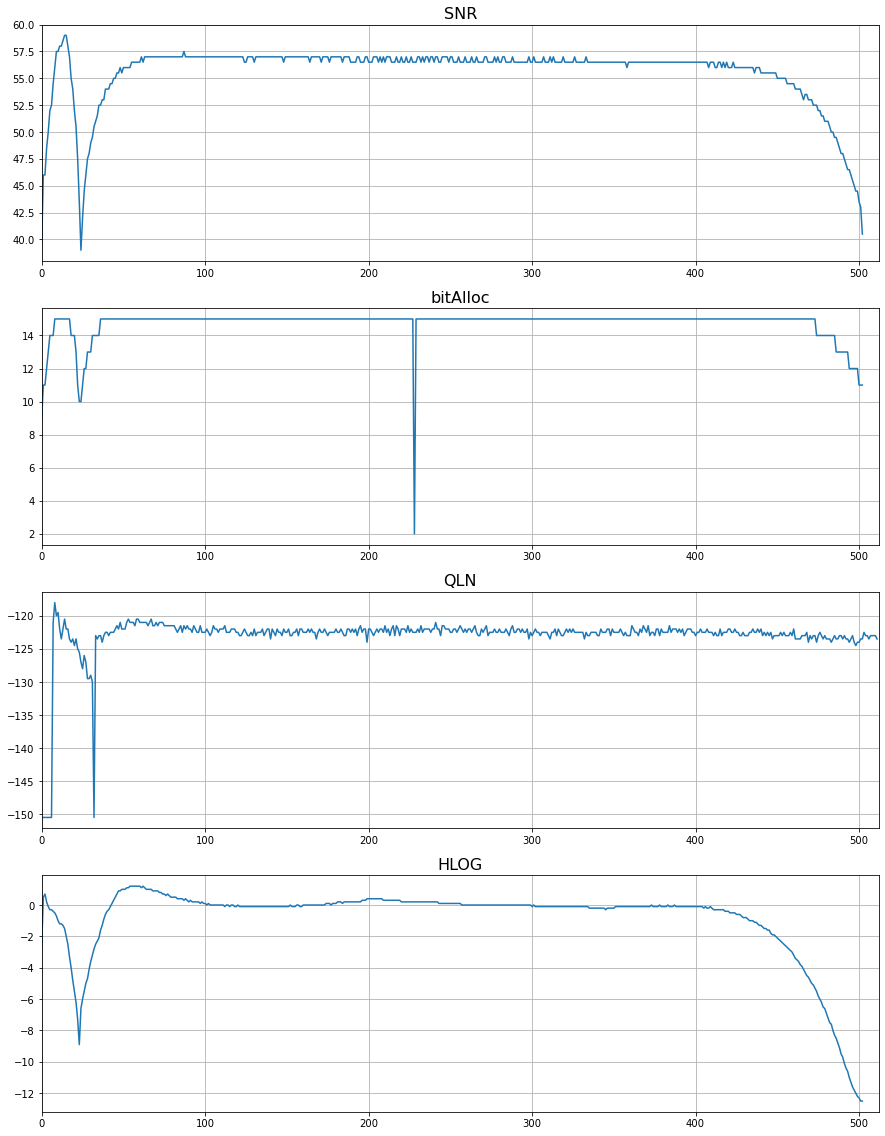

In [25]:
fig,ax = plt.subplots(4, 1, figsize = (15,20))

ax[0].plot(lstSNR)
ax[0].grid()
ax[0].set_title('SNR', fontsize = 16)
ax[0].set_xlim([0, 512])

ax[1].plot(lstB)
ax[1].grid()
ax[1].set_title('bitAlloc', fontsize = 16)
ax[1].set_xlim([0, 512])

ax[2].plot(lstQLN)
ax[2].grid()
ax[2].set_title('QLN', fontsize = 16)
ax[2].set_xlim([0, 512])

ax[3].plot(lsthlog)
ax[3].grid()
ax[3].set_title('HLOG', fontsize = 16)
ax[3].set_xlim([0, 512])